In [ ]:
import urllib.request
url = "http://epmgsenior.media.clients.ellingtoncms.com/img/photos/2012/04/30/p_2_goldfinch_2_t750x550.jpg?d885fc46c41745b3b5de550c70336c1b382931d2"
urllib.request.urlretrieve(url, "image.jpg")

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread('gold.jpg')
img_RGB= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_HSV = cv2.cvtColor(img_RGB, cv2.COLOR_RGB2HSV)
h,s,v = cv2.split(img_HSV)

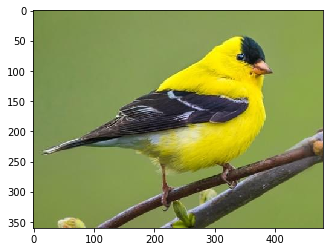

In [94]:
plt.imshow(img_RGB)

In [46]:
from sqlalchemy import create_engine
from sqlalchemy_utils import database_exists, create_database
import psycopg2
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [47]:
img_HSV.shape

(360, 480, 3)

In [50]:
img_HSV_shape = img_HSV.reshape(img_HSV.shape[0]*img_HSV.shape[1], img_HSV.shape[2])

In [52]:
img_HSV_shape.shape

(172800, 3)

In [116]:
h2 = v.reshape(-1,1)

In [117]:
h2.shape

(172800, 1)

In [138]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 8, random_state = 42)

In [139]:
kmeans.fit(img_HSV_shape)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [140]:
pic2show = kmeans.cluster_centers_[kmeans.labels_]

In [141]:
h3 = pic2show.reshape(360,480)

ValueError: cannot reshape array of size 518400 into shape (360,480)

In [142]:
cluster_pic = pic2show.reshape(img_HSV.shape[0], img_HSV.shape[1], img_HSV.shape[2])

In [143]:
h3_int = h3.astype(int)

In [144]:
cluster_int = cluster_pic.astype(int)

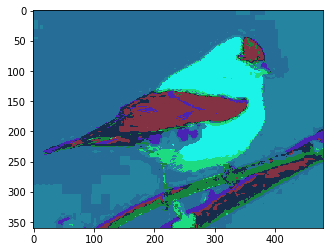

In [145]:
plt.imshow(cluster_int)


In [135]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [146]:
kmeans.cluster_centers_

array([[ 38.67793644, 110.22739477, 151.05758673],
       [ 27.630201  , 242.02573294, 232.11394188],
       [ 23.98778957,  44.27707406,  75.20335502],
       [130.15982942,  50.78081023,  67.63982942],
       [ 29.26034979, 219.33473544, 128.34757582],
       [ 23.08492539, 132.35183377,  62.74661832],
       [ 73.83189383,  36.0461344 , 180.94691384],
       [ 37.22809182, 132.71007182, 159.8610389 ]])

In [147]:
clusters = pd.DataFrame(kmeans.cluster_centers_, columns=["h","s","v"])

In [150]:
clusters

,h,s,v
0,38.677936,110.227395,151.057587
1,27.630201,242.025733,232.113942
2,23.987790,44.277074,75.203355
3,130.159829,50.780810,67.639829
4,29.260350,219.334735,128.347576
5,23.084925,132.351834,62.746618
6,73.831894,36.046134,180.946914
7,37.228092,132.710072,159.861039


In [151]:
clusters_multi = pd.concat([clusters]*100, ignore_index = True)

,h,s,v
0,38.677936,110.227395,151.057587
1,27.630201,242.025733,232.113942
2,23.987790,44.277074,75.203355
3,130.159829,50.780810,67.639829
4,29.260350,219.334735,128.347576
...,...,...,...
795,130.159829,50.780810,67.639829
796,29.260350,219.334735,128.347576
797,23.084925,132.351834,62.746618
798,73.831894,36.046134,180.946914


In [85]:
h3

array([[39.05609871, 39.05609871, 39.05609871, ..., 39.05609871,
        39.05609871, 39.05609871],
       [39.05609871, 39.05609871, 39.05609871, ..., 39.05609871,
        39.05609871, 39.05609871],
       [39.05609871, 39.05609871, 39.05609871, ..., 39.05609871,
        39.05609871, 39.05609871],
       ...,
       [39.05609871, 39.05609871, 39.05609871, ..., 39.05609871,
        39.05609871, 39.05609871],
       [39.05609871, 39.05609871, 39.05609871, ..., 39.05609871,
        39.05609871, 39.05609871],
       [39.05609871, 39.05609871, 39.05609871, ..., 39.05609871,
        39.05609871, 39.05609871]])